### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data loading

In [2]:
df = pd.read_csv('set.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


#### Checking the dataset information using the pd.info() method 

This is to get an overview of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


The dataset contains 5,880 entries, each representing a unique customer.
There are 21 columns in total, capturing various customer attributes and service-related information.
The data types are distributed as follows:

- 17 columns are of object type, likely representing categorical variables.
- 2 columns are of int64 type, representing integer values.
- 2 columns are of float64 type, representing decimal values.

### Data Cleaning

In [5]:
# removing CustomerID column from the dataset

df = df.drop(columns = ['customerID'], axis = 1)
df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
5,Female,0,Yes,No,35,Yes,No,DSL,No,No,No,Yes,Yes,Yes,One year,No,Credit card,116.96,4093.60,No
6,Male,0,Yes,No,17,No,No phone service,DSL,No,No,No,Yes,No,Yes,One year,Yes,Bank transfer,91.53,1556.01,Yes
7,Male,0,Yes,Yes,18,Yes,No,DSL,No,Yes,Yes,Yes,No,Yes,One year,No,Mailed check,26.52,477.36,Yes
8,Male,0,No,No,27,No,No phone service,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,67.77,1829.79,Yes
9,Female,0,No,No,15,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,86.45,1296.75,Yes


- Customer IDs are removed because they are unique identifiers that don't contain predictive information for the target variable (Churn).

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5880.000000,5880.000000,5880.000000,5880.000000
mean,0.500680,36.549150,70.157779,2566.813165
std,0.500042,20.909674,28.804615,1910.017743
min,0.000000,1.000000,20.000000,20.030000
25%,0.000000,18.000000,45.717500,1020.217500
50%,1.000000,37.000000,70.155000,2136.445000
75%,1.000000,55.000000,95.457500,3767.665000
max,1.000000,72.000000,119.990000,8589.600000


In [7]:
# getting the categorical columns in a list
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
cat_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [8]:
# removing Churn column from the dataset

del cat_columns[-1]
cat_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [9]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('SeniorCitizen')
numeric_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

### Exploratory Data Analysis

In [10]:
churn_rate = df['Churn'].value_counts()
print("Overall Churn Rate:")
print(churn_rate)

Overall Churn Rate:
Churn
No     2982
Yes    2898
Name: count, dtype: int64


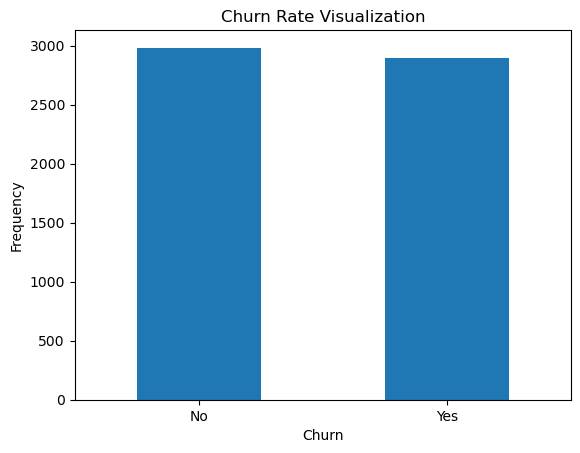

In [11]:
churn_rate.plot(kind='bar')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.xlabel('Churn')
plt.title('Churn Rate Visualization')
plt.show()

Text(0, 0.5, 'Frequency')

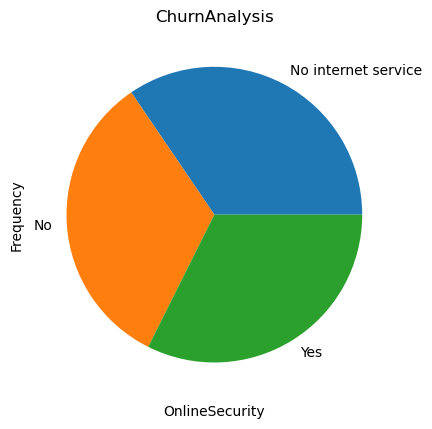

In [12]:
# Churn analysis by Online Security

df['OnlineSecurity'].value_counts().plot(kind='pie')
plt.title('ChurnAnalysis')
plt.xticks(rotation=0)
plt.xlabel('OnlineSecurity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

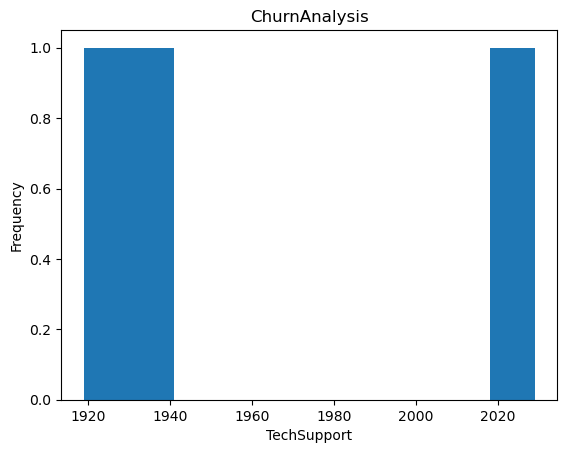

In [13]:
# Churn analysis by Tech Support

df['TechSupport'].value_counts().plot(kind='hist')
plt.title('ChurnAnalysis')
plt.xticks(rotation=0)
plt.xlabel('TechSupport')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

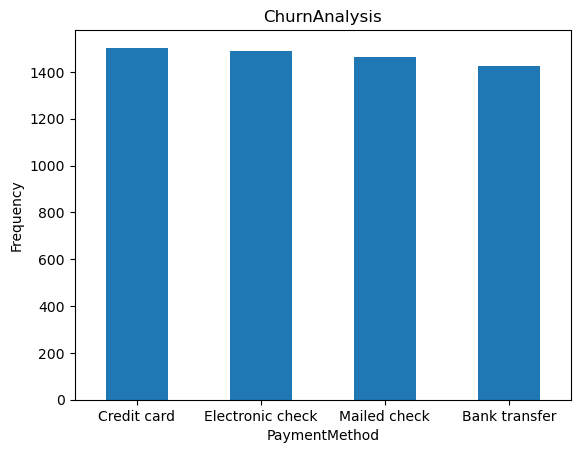

In [14]:
# Churn analysis by Customer's payment method

df['PaymentMethod'].value_counts().plot(kind='bar')
plt.title('ChurnAnalysis')
plt.xticks(rotation=0)
plt.xlabel('PaymentMethod')
plt.ylabel('Frequency')

In [15]:
for col in cat_columns:
    print(f"\nChurn Rate by {col}:")
    print(df.groupby(col)['Churn'].value_counts().unstack()['Yes'])


Churn Rate by gender:
gender
Female    1432
Male      1466
Name: Yes, dtype: int64

Churn Rate by Partner:
Partner
No     1407
Yes    1491
Name: Yes, dtype: int64

Churn Rate by Dependents:
Dependents
No     1479
Yes    1419
Name: Yes, dtype: int64

Churn Rate by PhoneService:
PhoneService
No     1475
Yes    1423
Name: Yes, dtype: int64

Churn Rate by MultipleLines:
MultipleLines
No                   692
No phone service    1475
Yes                  731
Name: Yes, dtype: int64

Churn Rate by InternetService:
InternetService
DSL             949
Fiber optic     941
No             1008
Name: Yes, dtype: int64

Churn Rate by OnlineSecurity:
OnlineSecurity
No                      961
No internet service    1008
Yes                     929
Name: Yes, dtype: int64

Churn Rate by OnlineBackup:
OnlineBackup
No                      962
No internet service    1008
Yes                     928
Name: Yes, dtype: int64

Churn Rate by DeviceProtection:
DeviceProtection
No                      925
No 

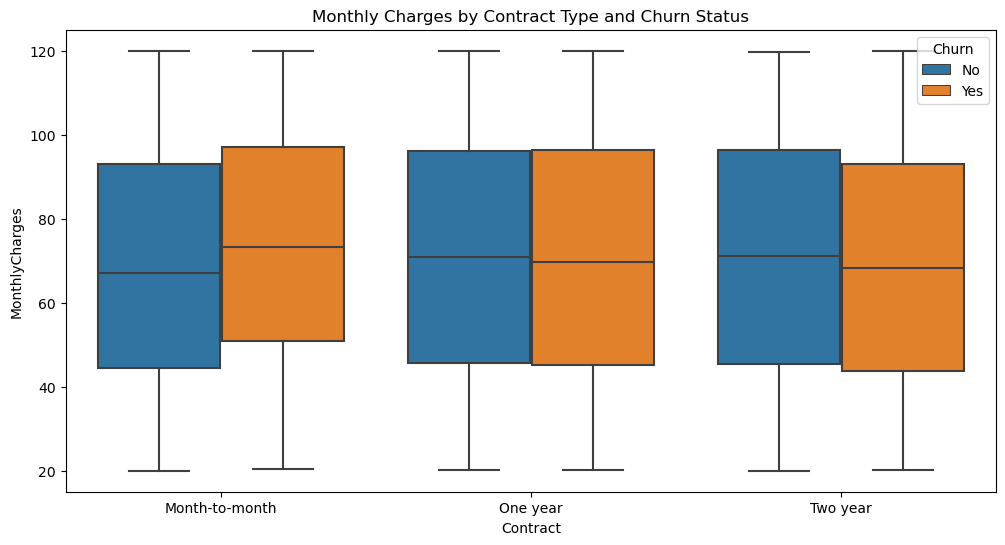

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges by Contract Type and Churn Status')
plt.show()

In [17]:
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.004328      0.770371
MonthlyCharges  0.004328        1.000000      0.556698
TotalCharges    0.770371        0.556698      1.000000


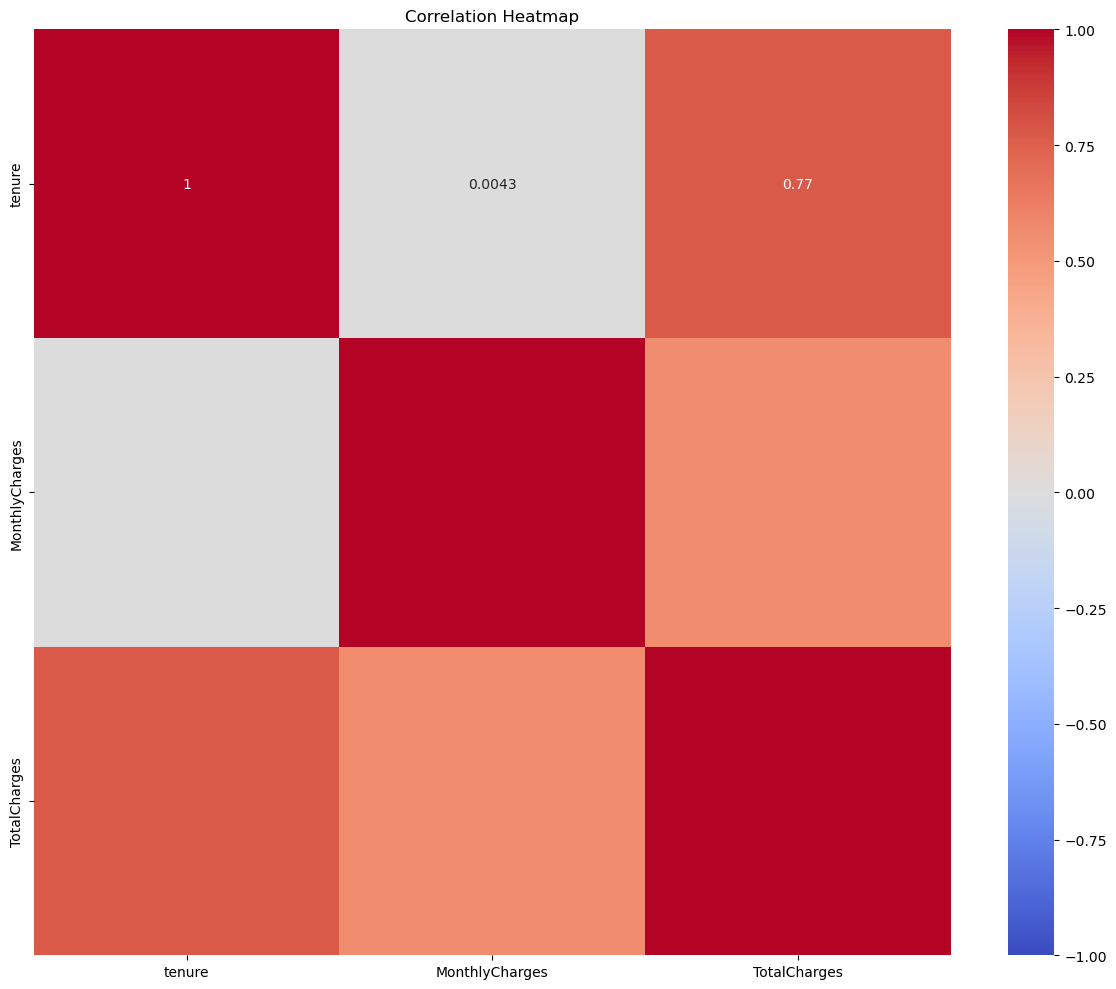

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Data Preprocessing

In [19]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

In [20]:
lb = LabelBinarizer()
lab_en = LabelEncoder()

### Function created to encode categorical dataset

In [21]:
def encode_data(columns):
    for i in columns:
        if df[i].nunique() == 2:
            df[i] = lb.fit_transform(df[i])
        else:
            df[i] = lab_en.fit_transform(df[i])
    return df

In [22]:
encode_data(cat_columns)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,23,0,1,2,1,1,1,1,1,1,0,1,0,49.85,1146.55,No
1,0,0,1,0,43,0,1,0,2,0,2,0,2,0,0,0,3,100.70,4330.10,Yes
2,1,1,0,0,51,1,0,0,0,2,2,2,0,0,1,0,2,97.33,4963.83,Yes
3,1,1,0,0,72,1,2,0,2,0,2,0,0,0,0,0,1,101.38,7299.36,No
4,1,1,0,0,25,1,2,0,0,0,0,2,0,2,0,0,2,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,1,0,1,1,71,1,0,0,2,0,0,2,0,0,0,1,3,74.21,5268.91,No
5876,1,0,0,0,22,1,2,0,0,0,2,2,0,2,1,0,3,65.43,1439.46,Yes
5877,0,0,0,0,68,0,1,1,2,0,2,2,2,0,1,1,0,59.78,4065.04,No
5878,0,0,1,1,14,0,1,1,2,2,2,2,2,2,0,1,3,91.88,1286.32,No


In [23]:
encode_data(['Churn'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,23,0,1,2,1,1,1,1,1,1,0,1,0,49.85,1146.55,0
1,0,0,1,0,43,0,1,0,2,0,2,0,2,0,0,0,3,100.70,4330.10,1
2,1,1,0,0,51,1,0,0,0,2,2,2,0,0,1,0,2,97.33,4963.83,1
3,1,1,0,0,72,1,2,0,2,0,2,0,0,0,0,0,1,101.38,7299.36,0
4,1,1,0,0,25,1,2,0,0,0,0,2,0,2,0,0,2,52.22,1305.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,1,0,1,1,71,1,0,0,2,0,0,2,0,0,0,1,3,74.21,5268.91,0
5876,1,0,0,0,22,1,2,0,0,0,2,2,0,2,1,0,3,65.43,1439.46,1
5877,0,0,0,0,68,0,1,1,2,0,2,2,2,0,1,1,0,59.78,4065.04,0
5878,0,0,1,1,14,0,1,1,2,2,2,2,2,2,0,1,3,91.88,1286.32,0


In [24]:
X = df.drop(columns = ['Churn'], axis = 1)
y = df['Churn']

In [25]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,1,23,0,1,2,1,1,1,1,1,1,0,1,0,49.85,1146.55
1,0,0,1,0,43,0,1,0,2,0,2,0,2,0,0,0,3,100.70,4330.10
2,1,1,0,0,51,1,0,0,0,2,2,2,0,0,1,0,2,97.33,4963.83
3,1,1,0,0,72,1,2,0,2,0,2,0,0,0,0,0,1,101.38,7299.36
4,1,1,0,0,25,1,2,0,0,0,0,2,0,2,0,0,2,52.22,1305.50


In [26]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Churn, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building

In [28]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [29]:
!pip install xgboost

In [30]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
logistic_model.predict(X_test)

array([0, 1, 0, ..., 1, 0, 0])

In [32]:
logistic_pred = logistic_model.predict(X_test)

In [33]:
def ConfusionMatrix(ytest, ypred, label = ["No Churn", "Churn"]):
    """This is a confusion matrix function to check the model performance"""
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'coolwarm')
    plt.xlabel('Predicted', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize = 13)
    plt.title('A confusion matrix');

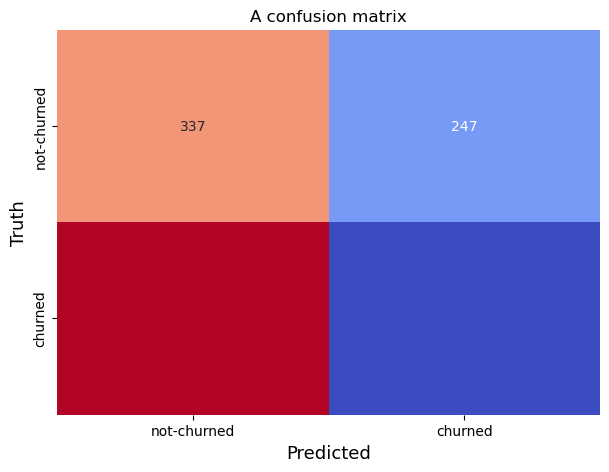

In [34]:
ConfusionMatrix(y_test, logistic_pred, label= ["not-churned", "churned"])

In [35]:
from sklearn.metrics import accuracy_score, f1_score

In [36]:
accuracy_score(y_test, logistic_pred)

0.4710884353741497

In [37]:
f1_score(y_test, logistic_pred)

0.4109848484848485

#### Naive Bayes

In [38]:
naivemodel = GaussianNB()

naivemodel.fit(X_train, y_train)

GaussianNB()

In [39]:
naivemodel_pred = naivemodel.predict(X_test)

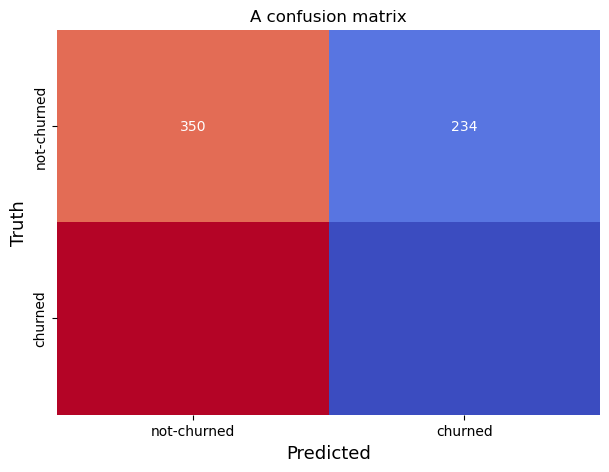

In [40]:
ConfusionMatrix(y_test, naivemodel_pred, label= ["not-churned", "churned"])

In [41]:
accuracy_score(y_test, naivemodel_pred)

0.483843537414966

In [42]:
f1_score(y_test, naivemodel_pred)

0.41913875598086126

#### Random Forest Model

In [43]:
randomforestmodel = RandomForestClassifier()

randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
randomforestmodel_pred = randomforestmodel.predict(X_test)

In [45]:
accuracy_score(y_test, randomforestmodel_pred)

0.4897959183673469

In [46]:
f1_score(y_test, randomforestmodel_pred)

0.4584837545126354

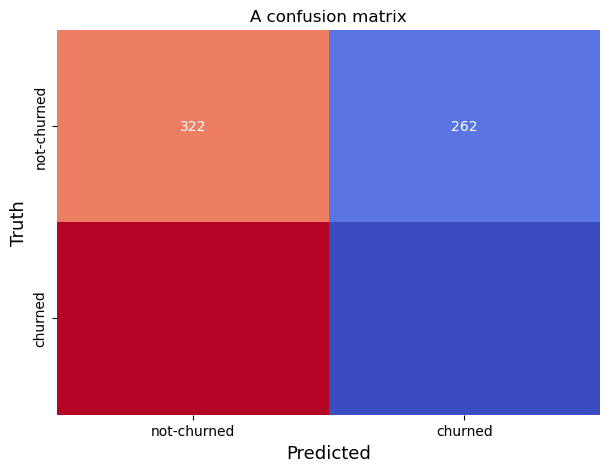

In [47]:
ConfusionMatrix(y_test, randomforestmodel_pred, label= ["not-churned", "churned"])

#### XGBoost Model

In [48]:
xgboostmodel = XGBClassifier(use_label_encoder=False)

xgbboostmodel = xgboostmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [08:00:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [49]:
xgbboostmodel_pred = xgboostmodel.predict(X_test)

In [50]:
accuracy_score(y_test, xgbboostmodel_pred)

0.5025510204081632

In [51]:
f1_score(y_test, xgbboostmodel_pred)

0.49612403100775193

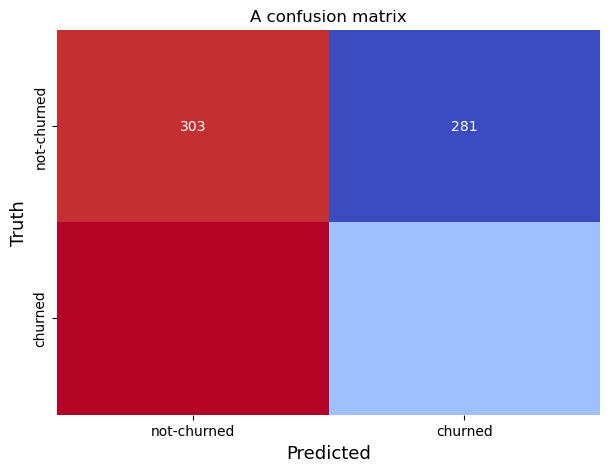

In [52]:
ConfusionMatrix(y_test, xgbboostmodel_pred, label= ["not-churned", "churned"])

#### SVM Model

In [53]:
SVMmodel = SVC()

SVMmodel.fit(X_train, y_train)

SVC()

In [54]:
svmmodel_pred = SVMmodel.predict(X_test)

In [55]:
accuracy_score(y_test, svmmodel_pred)

0.47874149659863946

In [56]:
f1_score(y_test, svmmodel_pred)

0.36079249217935344

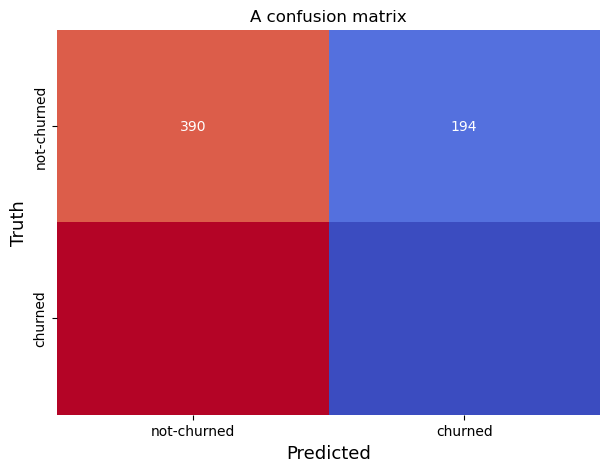

In [57]:
ConfusionMatrix(y_test, svmmodel_pred, label= ["not-churned", "churned"])

In [58]:
xgnewmodel = XGBClassifier(use_label_encoder=False, learning_rate = 0.1, max_depth = 10, max_delta_step =5, min_child_weight = 3, num_parallel_tree = 10)

In [59]:
xgnewmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [08:01:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=5,
              max_depth=10, max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=10, random_state=None, ...)

In [60]:
xgnewpred = xgnewmodel.predict(X_test)
xgnewpred

array([1, 0, 0, ..., 1, 1, 0])

In [61]:
accuracy_score(y_test, xgnewpred)

0.4957482993197279

In [62]:
import pickle

filename = 'finalxgb_model.sav'

# Save the model to disk
pickle.dump(xgboostmodel, open(filename, 'wb'))

### Xgboost Model was selected because it has the highest accuracy 

In [70]:
df.iloc[1]

gender                 0.0
SeniorCitizen          0.0
Partner                1.0
Dependents             0.0
tenure                43.0
PhoneService           0.0
MultipleLines          1.0
InternetService        0.0
OnlineSecurity         2.0
OnlineBackup           0.0
DeviceProtection       2.0
TechSupport            0.0
StreamingTV            2.0
StreamingMovies        0.0
Contract               0.0
PaperlessBilling       0.0
PaymentMethod          3.0
MonthlyCharges       100.7
TotalCharges        4330.1
Churn                  1.0
Name: 1, dtype: float64